# [10 Examples to Master Distribution Plots with Python Seaborn](https://towardsdatascience.com/10-examples-to-master-distribution-plots-with-python-seaborn-4ea2ceea906a)

### Import library

In [16]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [17]:
df=pd.read_csv("data/melb_data.csv", 
               usecols=["Regionname", "Type", "Rooms", 
                        "Distance", "Price"])
df.head()

,Rooms,Type,Price,Distance,Regionname
0,2,h,1480000.0,2.5,Northern Metropolitan
1,2,h,1035000.0,2.5,Northern Metropolitan
2,3,h,1465000.0,2.5,Northern Metropolitan
3,3,h,850000.0,2.5,Northern Metropolitan
4,4,h,1600000.0,2.5,Northern Metropolitan


In [18]:
df.dtypes

Rooms           int64
Type           object
Price         float64
Distance      float64
Regionname     object
dtype: object

In [19]:
df.Type.unique()

array(['h', 'u', 't'], dtype=object)

### Example 1
The first example is to create a basic histogram. It divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.

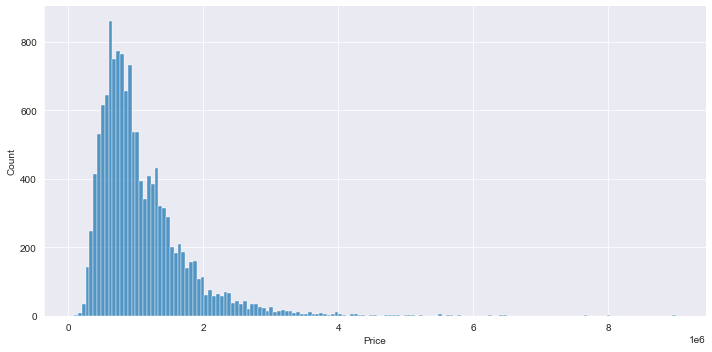

In [20]:
sns.displot(data=df, x='Price', aspect=2)

In the first example, we clearly see that there are outliers in the price column. The histogram has a long tail to the right which indicates there are few houses with very high prices.
One method to reduce the effect of such outliers is to take the log of values. The displot function can perform this operation using the log_scale parameter.

### Example 2
In the first example, we clearly see that there are outliers in the price column. The histogram has a long tail to the right which indicates there are few houses with very high prices.

One method to reduce the effect of such outliers is to take the log of values. The displot function can perform this operation using the log_scale parameter.

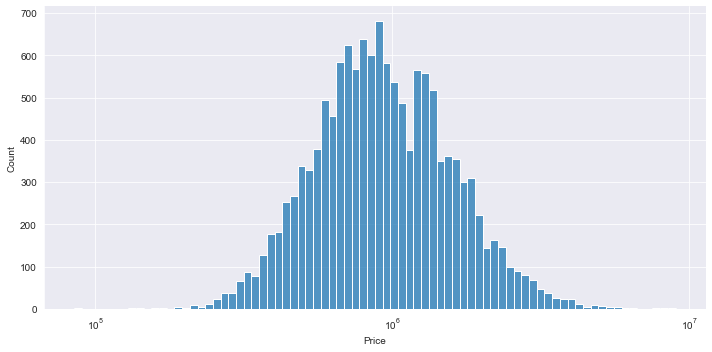

In [21]:
sns.displot(data=df, x="Price", aspect=2, log_scale=10)

The price is represented as the power of 10. We now have a better overview of the distribution of house prices.

### Example 3
We can also adjust the number of bins in the histogram. In some cases, it is preferred to have less number of bins so that we get a more structured overview.

The parameter to use for this adjustment is the bins.

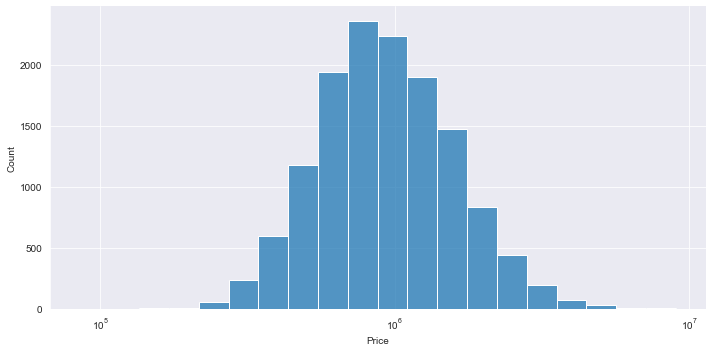

In [22]:
sns.displot(data=df, x="Price", bins=20, log_scale=10, 
           aspect=2)

### Example 4
The dataset also contains categorical variables. For instance, the type column has 3 categories which are h (house), t (town house), and u (unit). We may need to check the distribution of each type separately.
One option is to show them with different colors in the same visualization. We just need to pass the name of the column to the hue parameter.

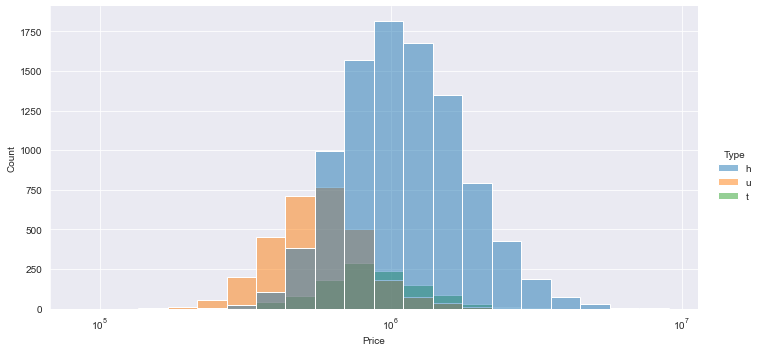

In [23]:
sns.displot(data=df, x="Price", 
           hue="Type", 
           bins=20, 
           log_scale=10, 
           aspect=2)

This plot provides us with 2 pieces of information:
* The size of each category with regards to the number of houses. The h category is the largest one.
* The price distribution of the houses in each category.

### Example 5
Another option to check the distribution for each category separately is to create separate plots. We can either use the col or row parameter for this task. There will be a subplot for each category in the given column.

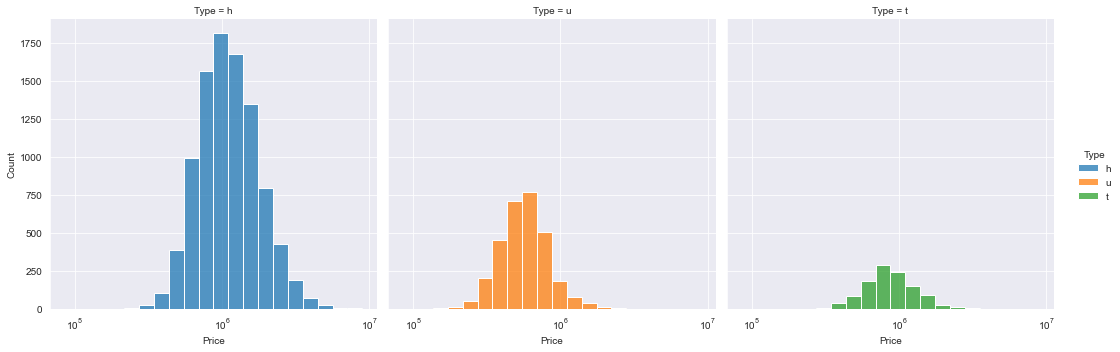

In [24]:
sns.displot(data=df, x="Price", 
           hue="Type", 
           col="Type", 
           bins=20, 
           log_scale=10)

### Example 6
The displot function also allows for generating 2-dimensional histograms. Therefore, we get an overview of the distribution of the observations (i.e. rows) with regards to the values in 2 columns.
Let’s create one using the price and distance columns. We just pass the column names to the x and y parameters.

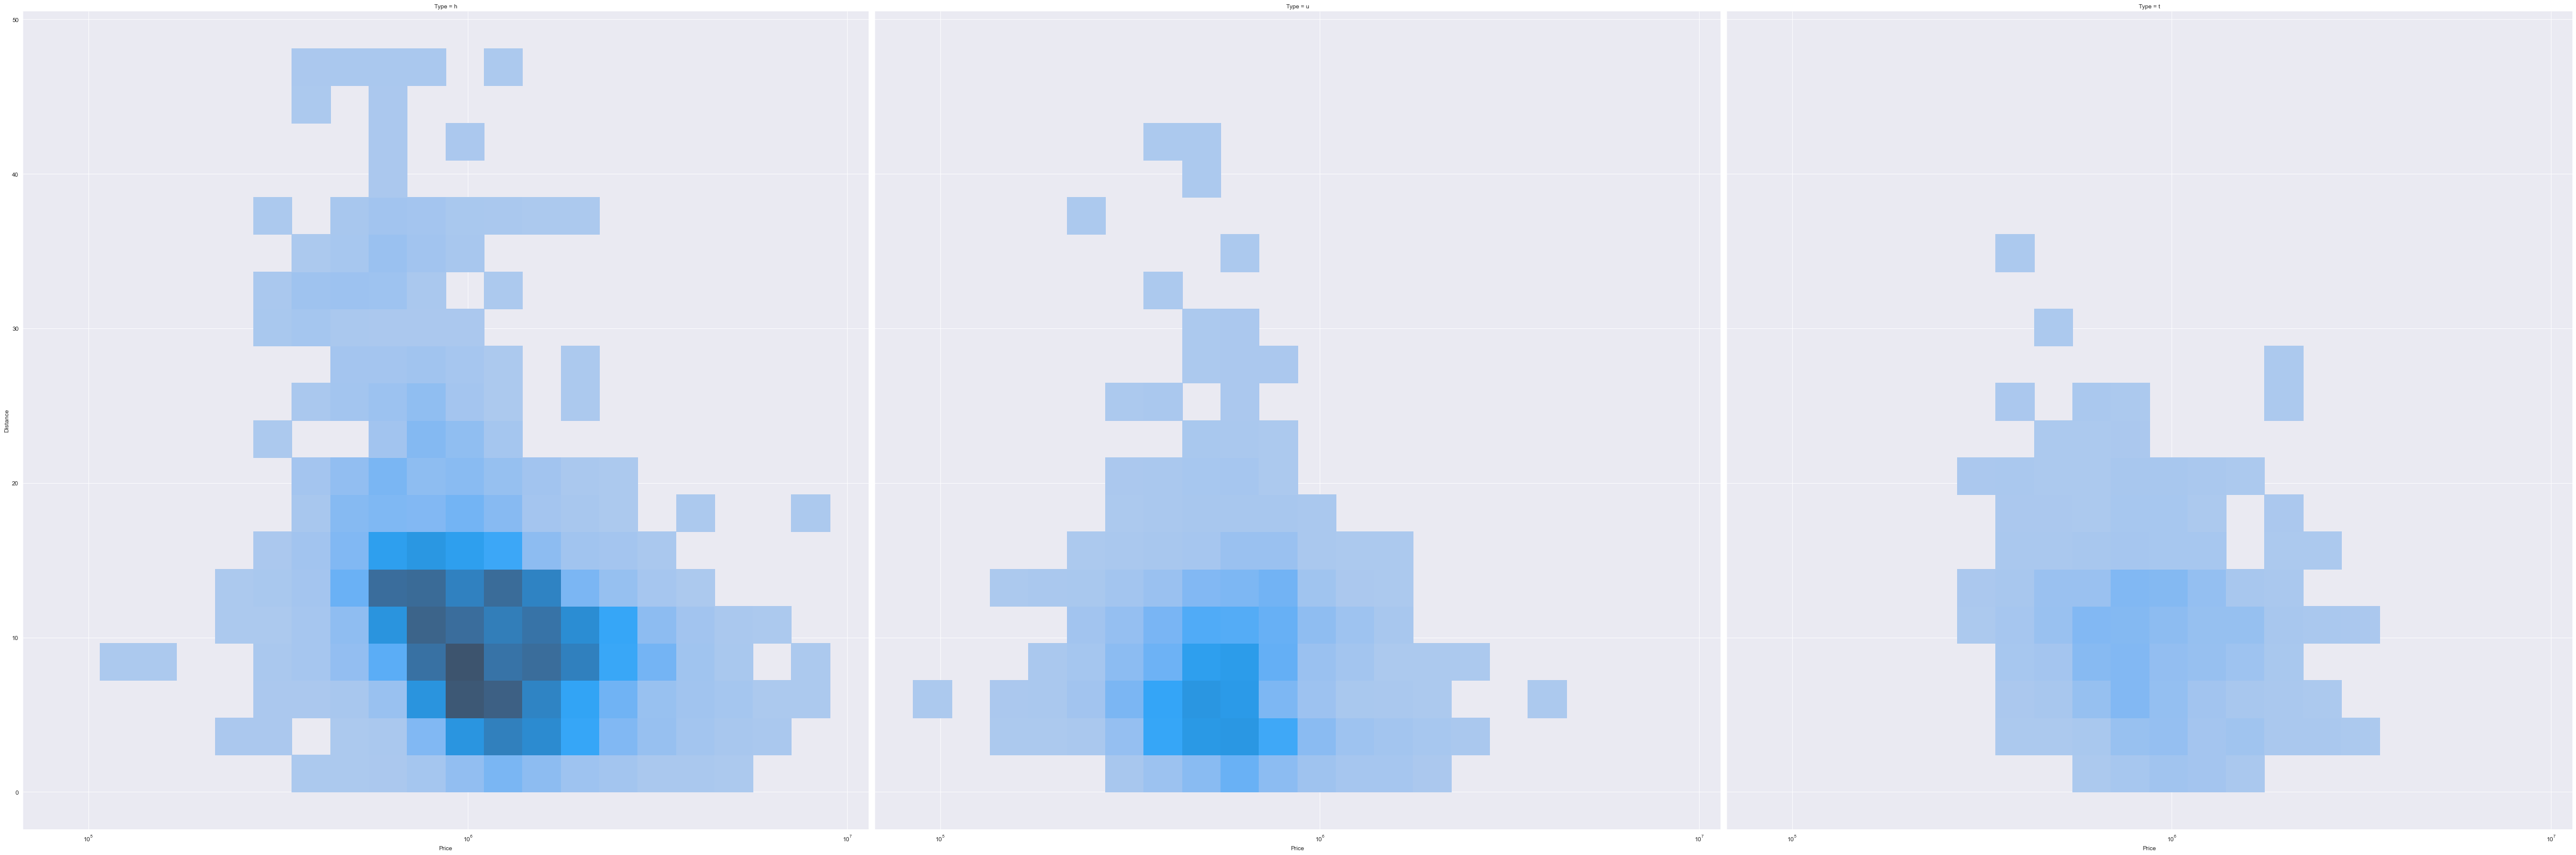

In [25]:
sns.displot(data=df,
              x="Price",
              y="Distance",
              col="Type",
              kind="hist",
              height=20,
              aspect=1,
              log_scale=(10,0),
              bins=20)

The darker regions are more dense so they contain more observations. Both columns seem to have a normal distribution because the dense regions are in the center.
You may have noticed that we used a tuple as the argument for the log_scale parameter. Thus, we can pass a different scale for each column.

### Example 7
Kde plots can be used for visualizing the distribution of variables as well. They are quite similar to the histograms. However, a kde plot represents the distribution using a continuous probability density curve rather than with discrete bins.

The `kind` parameter is set as `kde` to generate kde plots.

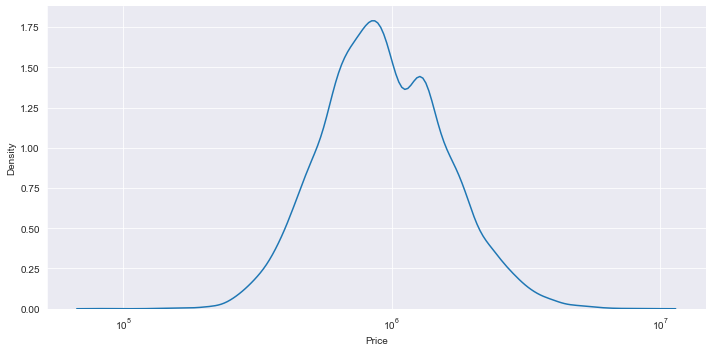

In [26]:
sns.displot(data=df, 
           x="Price", 
           kind="kde", 
           aspect=2, 
           log_scale=10)

### Example 8
Similar to the histograms, kde plots can be drawn separately for different categories. Our dataset contains region information of the houses. Let’s check how price changes in different regions.

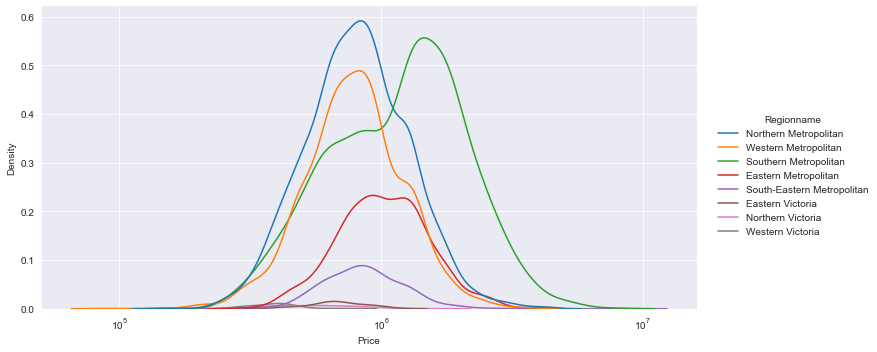

In [27]:
sns.displot(data=df, 
           x="Price", 
           kind="kde",
           hue="Regionname", 
           aspect=2, 
           log_scale=10)

Southern Metropolitan region seems to have the highest average house price.


### Example 9
Another method for checking the distribution of a variable is using an ecdf plot. It represents the proportion or count of observations falling below each unique value in the given column.

It is kind of visualizing the cumulative sum. As a result, we are able to see the more dense value ranges.

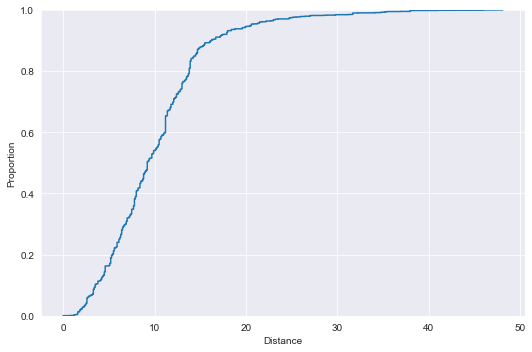

In [28]:
sns.displot(data=df, 
           x="Distance", 
           kind="ecdf", 
           height=5, 
           aspect=1.5)

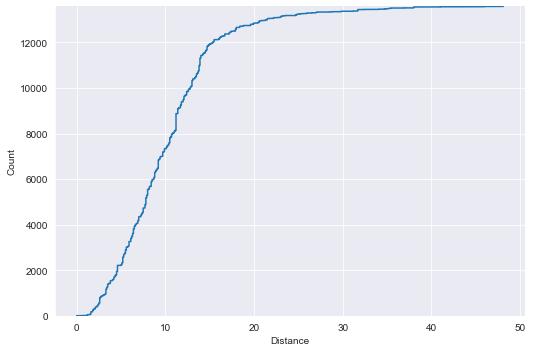

In [29]:
sns.displot(data=df, 
           x="Distance", 
           kind="ecdf", 
           height=5, 
           aspect=1.5, 
           stat="count")

The value ranges in which the slope of the curve is high are populated with more observations. For instance, we do not have many houses with distance higher than 30. Contrary to this, there are lots of houses in the distance range between 10 and 15.

### Example 10
The ecdf plots support hue, col, and row parameters as well. Therefore, we can distinguish the distribution between different categories in a column.

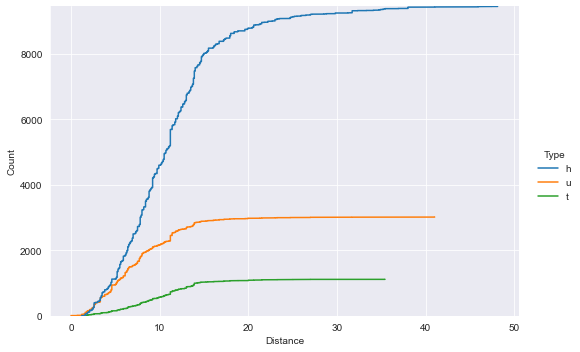

In [30]:
sns.displot(data=df, 
           x="Distance", 
           kind="ecdf", 
           hue="Type", 
           aspect=1.5, 
           stat="count")